In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)
print(x)
print(tx)

[ 1.94406149  0.62753668  2.01244346 ..., -0.64968792  0.69312469
 -1.14970831]
[[ 1.          1.94406149]
 [ 1.          0.62753668]
 [ 1.          2.01244346]
 ..., 
 [ 1.         -0.64968792]
 [ 1.          0.69312469]
 [ 1.         -1.14970831]]


In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    e = y - np.matmul(tx,w)
    return (1/(2*y.shape[0]))*np.sum(np.matmul(np.transpose(e),e))

w = [1,2]
print("orada kimse var mı")
print(compute_loss(y, tx, np.transpose(w)))
print("orada kimse var mı")

orada kimse var mı
2694.48336589
orada kimse var mı


# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for i in range(0,losses.shape[0]):
        for j in range(0, losses.shape[1]):
            losses[i,j] = compute_loss(y, tx, np.transpose([w0[i],w1[j]]))
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.027 seconds


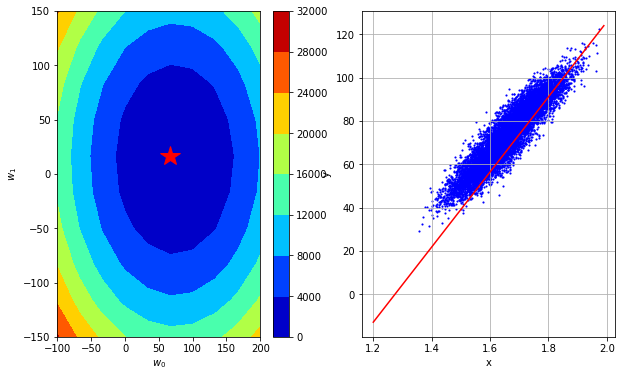

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - np.matmul(tx,w)
    return (-1/y.shape[0])*np.matmul(np.transpose(tx), e)


Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        delta = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - delta*gamma
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2792.2367127591665, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): loss=265.30246210896195, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): loss=37.8783795504416, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): loss=17.4102121201745, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): loss=15.568077051450453, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): loss=15.402284895265298, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): loss=15.387363601208634, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): loss=15.386020684743533, w0=73.28911318788263, w1=13.478828031056189
Gradient Descent(8/49): loss=15.38589982226167, w0=73.29247935783842, w1=13.47944711380919
Gradient Descent(9/49): loss=15.385888944638303, w0=73.29348920882516, w1=13.47963283863509
Gradient Descent(10/49): loss=15.385887965652202, w0=73.29379216412119, w1=13.

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

A Jupyter Widget

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        delta = 0
        loss = 0
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            loss += compute_loss(minibatch_y, minibatch_tx, w)
            delta += compute_stoch_gradient(minibatch_y, minibatch_tx, w)
        delta = delta/batch_size
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - delta*gamma
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws


In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=751.9271470487281, w0=27.145692183249878, w1=-73.2972875092091
Gradient Descent(1/49): loss=26.317905607674767, w0=32.224230112174034, w1=-75.4689225378578
Gradient Descent(2/49): loss=6286.662531249629, w0=110.71581743606905, w1=-18.16595686052336
Gradient Descent(3/49): loss=1864.338148596608, w0=67.97179580000073, w1=5.690795234342001
Gradient Descent(4/49): loss=137.1678679921851, w0=79.5659542702107, w1=15.728610687387313
Gradient Descent(5/49): loss=48.77495697707053, w0=72.65223907232114, w1=10.392525964965479
Gradient Descent(6/49): loss=22.717382191661127, w0=67.93386704927887, w1=16.60734249451078
Gradient Descent(7/49): loss=93.32204203449953, w0=77.49710923976059, w1=20.97022791578511
Gradient Descent(8/49): loss=0.7042926995657245, w0=76.66632235639374, w1=21.893287099844837
Gradient Descent(9/49): loss=394.1510507044756, w0=57.012619659690856, w1=-17.779024537364922
Gradient Descent(10/49): loss=429.90948537721016, w0=77.53848859792745, w1=-9.

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

A Jupyter Widget

<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

(array([ 1.84617543,  1.61956457,  1.75130444,  1.68698379,  1.77980506,
        1.69311873,  1.7464897 ,  1.65415908,  1.74927259,  1.7417531 ,
        1.80156887,  1.5932762 ,  1.75779236,  1.82752191,  1.74400237,
        1.76296288,  1.80537587,  1.77580963,  1.85541077,  1.66391312,
        1.66060468,  1.76122186,  1.76178493,  1.79907538,  1.61716728,
        1.76770188,  1.70357696,  1.8393321 ,  1.73421441,  1.70006511,
        1.69754522,  1.6849005 ,  1.6742234 ,  1.69250895,  1.79144149,
        1.8651167 ,  1.76672158,  1.80968923,  1.70567423,  1.55683504,
        1.73045512,  1.66207766,  1.66572365,  1.780957  ,  1.8054684 ,
        1.76224051,  1.59385372,  1.62349974,  1.74740543,  1.83502583,
        1.52686218,  1.78328282,  1.68912354,  1.79777279,  1.82748209,
        1.8166126 ,  1.83477468,  1.76423638,  1.6037424 ,  1.71725933,
        1.69456645,  1.72979561,  1.73693525,  1.69210814,  1.74713253,
        1.70094191,  1.65556296,  1.70739446,  1.77866764,  1.8

AttributeError: 'tuple' object has no attribute 'T'

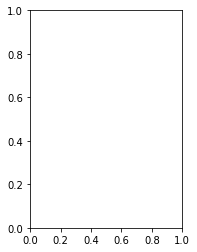

In [15]:
X = load_data(sub_sample=True)
print(X)
fig = grid_visualization(X, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)